In [2]:
import warnings
warnings.filterwarnings("ignore")

## Automatic Phase Flip Graph Coloring Oracle (Three Nodes)

In [1]:
import numpy as np

num_vertices = 3
edges_list = [(0, 1), (1, 2)]

num_edges = len(edges_list)
num_qubits = int((2 * num_vertices) + num_edges + 1)

print(f"Number of Qubits: {num_qubits}")

Number of Qubits: 9


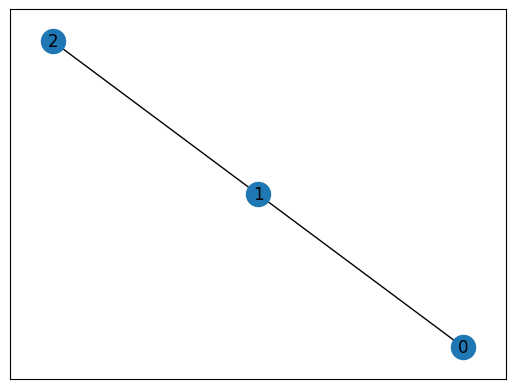

In [2]:
import networkx as nx
from networkx import Graph

def display_graph(num_vertices: int, edges_list: list[tuple[int]]):
    G = Graph()

    G.add_nodes_from(list(range(num_vertices)))
    G.add_edges_from(edges_list)

    nx.draw_networkx(G, pos=nx.spring_layout(G), with_labels=True)

display_graph(num_vertices=num_vertices, edges_list=edges_list)

In [3]:
from qiskit.quantum_info import Statevector

psi_0 = Statevector.from_label("000000000")
psi_0.draw("latex")

<IPython.core.display.Latex object>

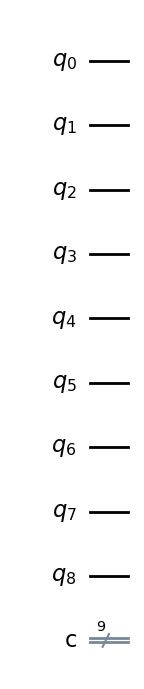

In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

q_regs = QuantumRegister(num_qubits, name='q')
c_regs = ClassicalRegister(num_qubits, name='c')

circuit = QuantumCircuit(q_regs, c_regs)
circuit.draw("mpl")

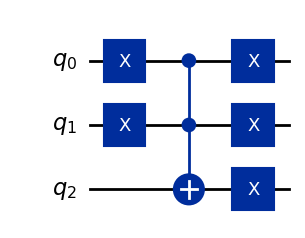

In [5]:
from qiskit import QuantumCircuit

def ORGate():
    qc = QuantumCircuit(3)

    qc.x(0)
    qc.x(1)
    qc.ccx(control_qubit1=0,
                control_qubit2=1,
                target_qubit=2)
    qc.x(0)
    qc.x(1)
    qc.x(2)

    return qc

ORGate().draw("mpl")

In [6]:
from IPython.display import display

testing_states = [
    Statevector.from_label("000"),
    Statevector.from_label("010"),
    Statevector.from_label("001"),
    Statevector.from_label("011"),
]

for states in testing_states:
    display(states.evolve(ORGate()).draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

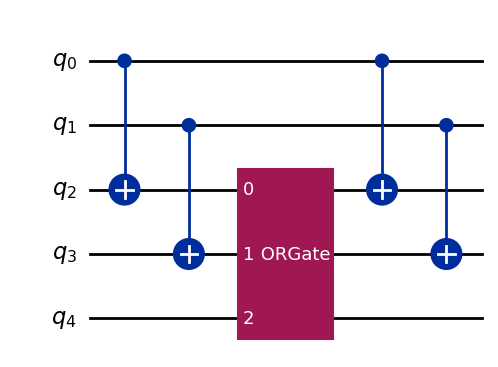

In [7]:
from qiskit import QuantumCircuit

def similarity_operator():
    qc = QuantumCircuit(5)

    qc.cx(0, 2)
    qc.cx(1, 3)

    qc.append(ORGate().to_gate(label=" ORGate"), [2, 3, 4])

    qc.cx(0, 2)
    qc.cx(1, 3)

    return qc

similarity_operator().draw("mpl")

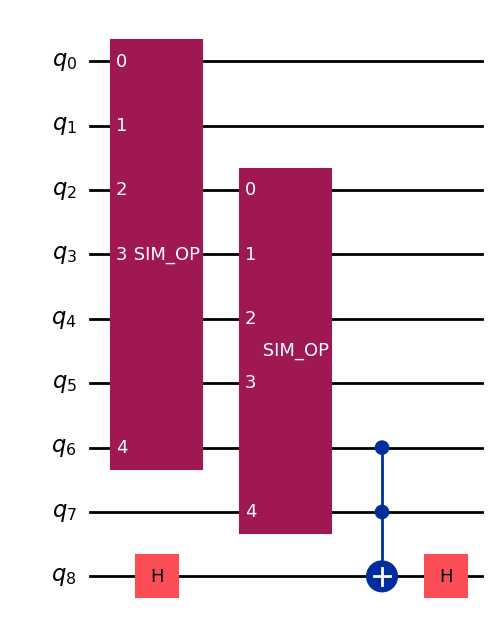

In [8]:
from qiskit import QuantumCircuit

def grover_oracle():
    qc = QuantumCircuit(9)

    qc.append(similarity_operator().to_gate(label=" SIM_OP"), [0, 1, 2, 3, 6])
    qc.append(similarity_operator().to_gate(label=" SIM_OP"), [2, 3, 4, 5, 7])

    qc.h(8)
    qc.mcx([6, 7], 8)
    qc.h(8)

    return qc

grover_oracle().draw("mpl")

In [9]:
from qiskit.quantum_info import Statevector

test_input = Statevector.from_label("100101101")
test_input.draw("latex")

<IPython.core.display.Latex object>

In [10]:
test_output = test_input.evolve(grover_oracle())
test_output.draw("latex")

<IPython.core.display.Latex object>

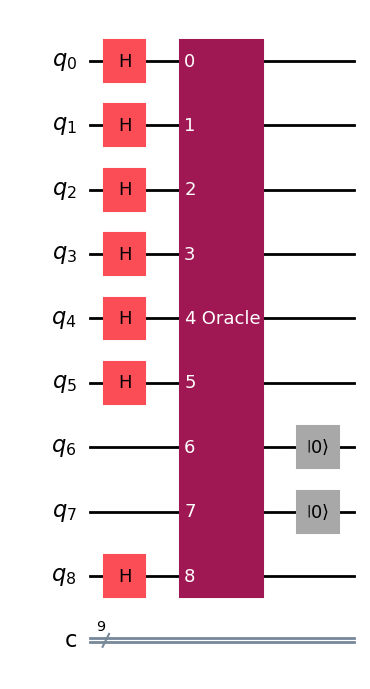

In [11]:
from qiskit import QuantumCircuit

q_regs = QuantumRegister(num_qubits, name='q')
c_regs = ClassicalRegister(num_qubits, name='c')

circuit = QuantumCircuit(q_regs, c_regs)
circuit.h([0, 1, 2, 3, 4, 5, 8])

circuit.append(grover_oracle().to_gate(label=' Oracle'), q_regs)
circuit.reset([6, 7])

circuit.draw("mpl")

In [12]:
psi_0.draw("latex")

<IPython.core.display.Latex object>

In [13]:
psi_2 = psi_0.evolve(circuit)
psi_2.draw("latex")

<IPython.core.display.Latex object>

In [14]:
psi_2[int("100111000", 2)]

np.complex128(-0.11785113019775793+0j)

## Apply Grover's Searching Algorithm on the Three Node Problem

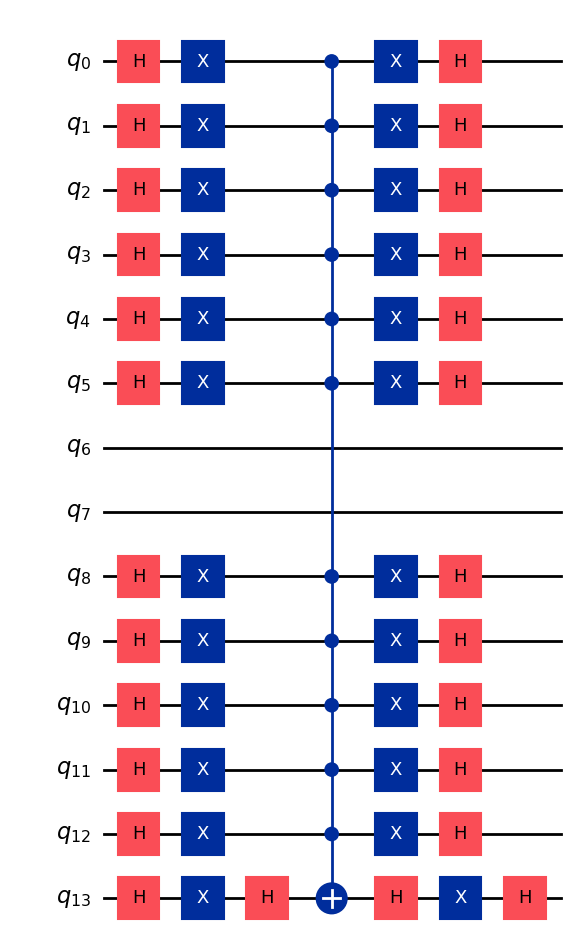

In [14]:
from qiskit.circuit.library import GlobalPhaseGate
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
import numpy as np

def diffusion_operator():
    qc = QuantumCircuit(14)
    qc.h([0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13])
    qc.x([0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13])

    qc.h(13)
    qc.mcx([0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12], 13)
    qc.h(13)

    qc.x([0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13])
    qc.h([0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13])

    qc.append(Operator(GlobalPhaseGate(phase=np.pi)))

    return qc

diffusion_operator().draw("mpl")

In [15]:
from qiskit.quantum_info import Operator

# Operator(diffusion_operator().to_gate(label=' Diffusion')).draw("latex")

In [16]:
import numpy as np

num_iterations = int(np.sqrt(((2 ** num_qubits) - 1)))
num_iterations

127

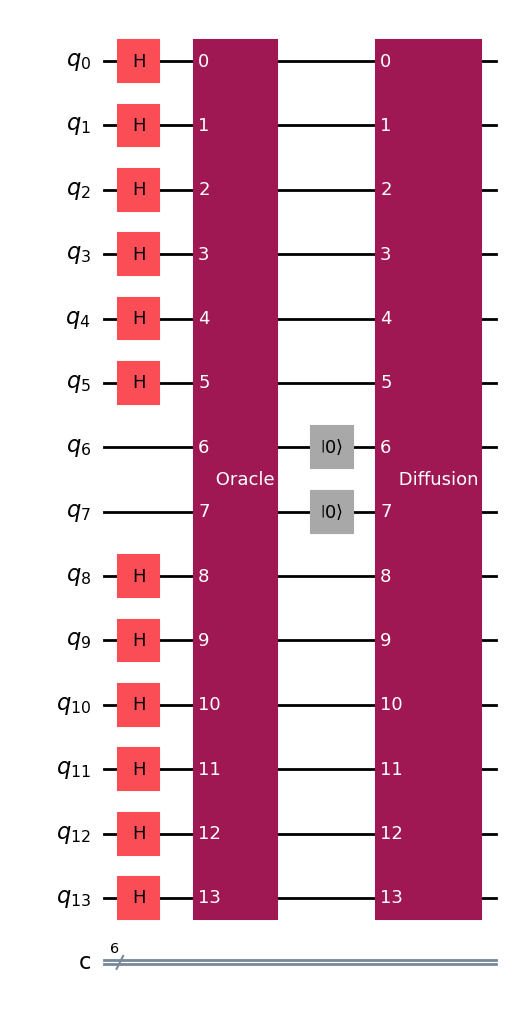

In [17]:
q_regs = QuantumRegister(num_qubits, name='q')
c_regs = ClassicalRegister(6, name='c')

circuit = QuantumCircuit(q_regs, c_regs)
circuit.h([0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13])

for _ in range(1):
    circuit.append(grover_oracle().to_gate(label=' Oracle'), q_regs)
    circuit.reset([6, 7])
    circuit.append(diffusion_operator().to_gate(label=' Diffusion'), q_regs)

circuit.draw("mpl")

In [18]:
psi_2 = psi_0.evolve(circuit)
psi_2.draw("latex")

<IPython.core.display.Latex object>

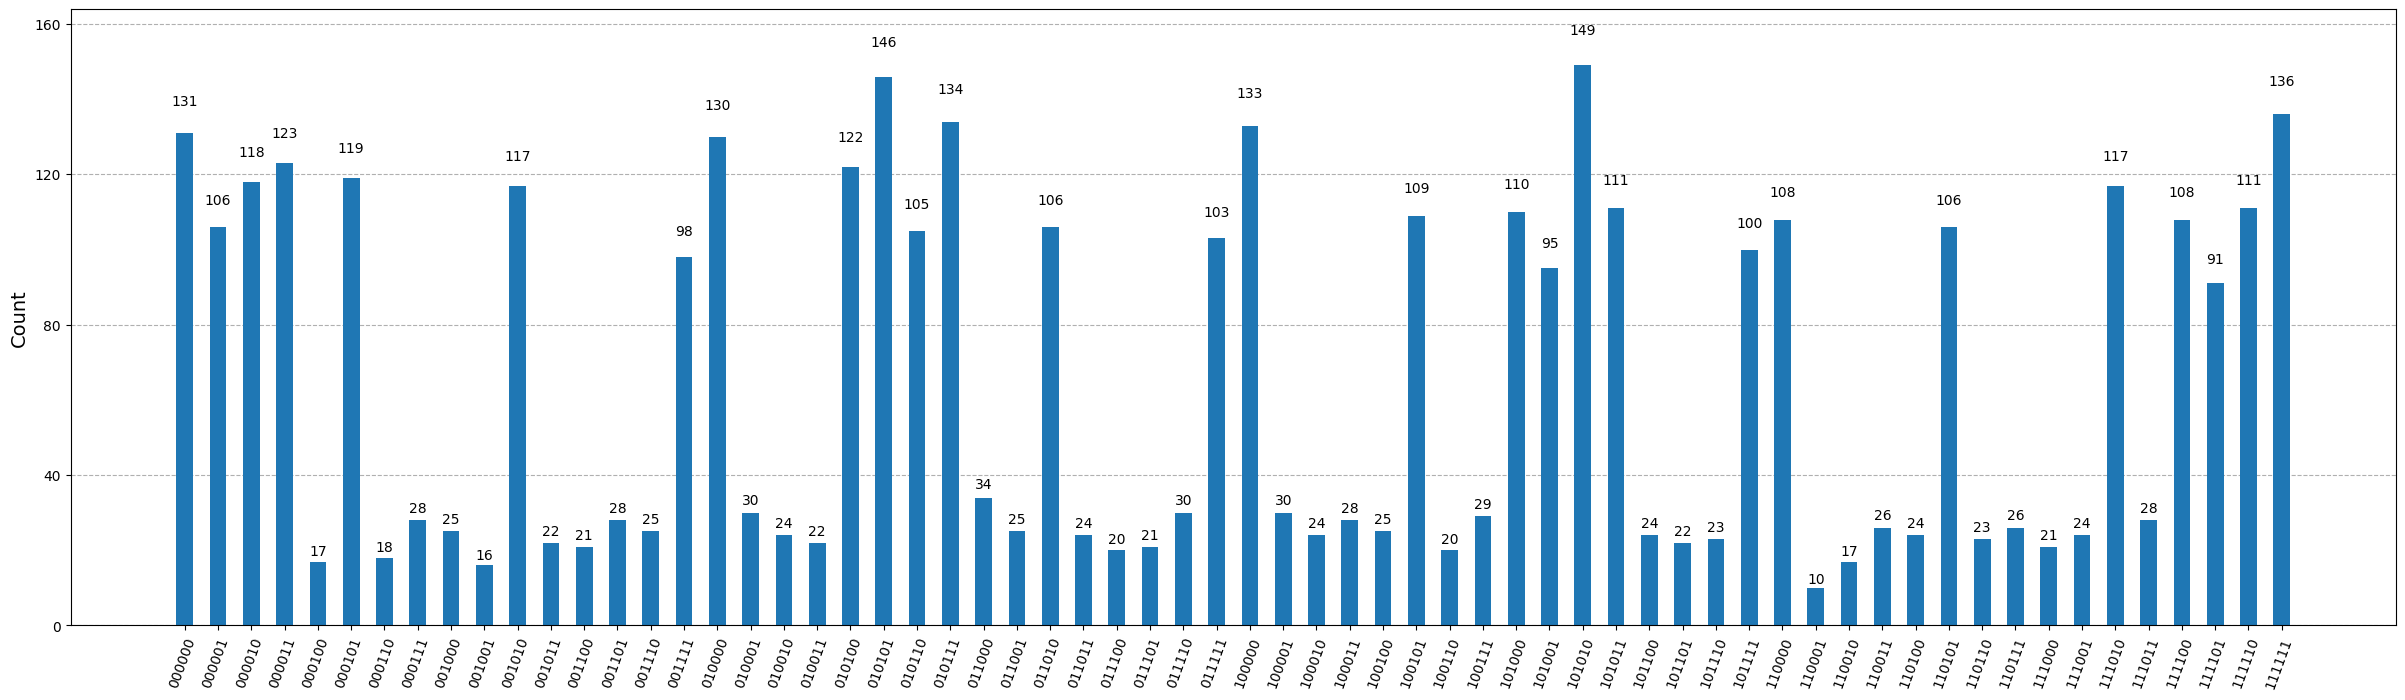

In [19]:
from qiskit import transpile
from qiskit_aer.backends import QasmSimulator
from qiskit.visualization import plot_histogram

circuit.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])
circuit = transpile(circuit)

backend = QasmSimulator()
job = backend.run(circuit, shots=4096)
counts = job.result().get_counts()

plot_histogram(counts, figsize=(30, 8))